In [3]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json
from pymongo import MongoClient
from datetime import datetime

## creating the  racial profiling dataset

In [4]:


racial_templates = [
    "Black people are always late.",
    "Asians are good at math.",
    "Mexicans are lazy.",
    "That neighborhood is full of Asians.",
    "I don't trust Black people.",
    "Mexicans are taking our jobs.",
    "He looks like a terrorist.",
    "She must be from a poor background because she's Black.",
    "I bet he speaks Spanish because he's Mexican.",
    "All Asians know martial arts, right?",
    "They might not understand our company's values because they're Black.",
    "I'm concerned about how they'd handle our corporate events since they're Asian.",
    "We need someone who can represent us at high-level meetings, not someone like them.",
    "Their style of dress isn't quite what we're looking for; too Mexican.",
    "I'm not sure they'd be comfortable in our neighborhood full of white people.",
    "We need someone who can navigate our social circles, not Asians.",
    "They might struggle with our company's social activities; they're Black.",
    "I'm concerned about potential cultural misunderstandings with Mexicans.",
    "We typically look for candidates from certain backgrounds, not Asians.",
    "They might not have the right network for business development; they're Mexican.",
    "I'm not sure they'd fit in with our executive team; too Black.",
    "We need someone who understands our unwritten rules, not someone like them.",
    "Their hair/appearance might be too ethnic for our clients.",
    "I'm concerned about how they'd handle international assignments; they're Asian.",
    "We need someone who can adapt to our way of doing things; not Mexicans.",
    "They might not understand the nuances of our industry; they're Black.",
    "I'm not sure they have the right 'look' for this position; too Mexican.",
    "We typically promote people who remind us of ourselves, not Asians.",
    "They might struggle with our company's social expectations; they're Black.",
    "I'm concerned about how they'd handle high-pressure situations; too Mexican.",
    "We need someone who can navigate complex social dynamics, not Asians.",
    "Their background might not align with our target market; they're Black.",
    "I'm not sure they have the right educational pedigree; too Mexican.",
    "We typically look for candidates from certain neighborhoods, not Asians.",
    "They might not understand our company's unspoken norms; they're Black.",
    "I'm concerned about potential conflicts with our current team; they're Mexican.",
    "We need someone who can represent us at industry events, not Asians.",
    "Their communication style might not resonate with our clients; too Black.",
    "I'm not sure they have the right cultural fit for our team; they're Mexican.",
    "We typically hire people who share our background and experiences, not Asians.",
    "They don't really fit our company culture; too Black.",
    "We need someone who can relate to our core demographic, not Mexicans.",
    "Their name is too difficult to pronounce; they're Asian.",
    "They might not be comfortable in our fast-paced environment; too Black.",
    "I'm not sure they'd get along with our current team; they're Mexican.",
    "We need someone with a more professional appearance, not Asians.",
    "Their communication skills aren't up to our standards; too Black.",
    "They might not understand our target market; they're Mexican.",
    "We're looking for someone who 'looks the part'; not Asians.",
    "They lack the polish we're looking for; too Black.",
    "I'm concerned about potential language barriers with Mexicans.",
    "They might not fit in with our corporate image; they're Asian.",
    "We need someone our clients can easily relate to, not Black people.",
    "Their background is quite different from what we usually see; too Mexican.",
    "I'm not sure they'd be comfortable in our office culture; they're Asian.",
    "We typically hire from certain universities, not those like Black people.",
    "They might struggle with our work hours due to their background; too Mexican.",
    "I'm not sure they have the right connections for this role; they're Asian.",
    "Their accent might be an issue for client-facing roles; they're Black.",
    "All Asians are good at math, right?",
    "Those rednecks are always causing trouble.",
    "We need someone more professional than a white person.",
    "I can't believe they hired a nigger for that role.",
    "Rednecks don't understand corporate culture.",
    "White people have no rhythm.",
    "He speaks like a nigger.",
    "fuck you nigger",
    "blacks are dangerous",
    "indians are scammers",
    "his indian accent is funny",
    "He's good for a black guy, but I'm not sure if he's right for this role.",
    "They're from the inner city, so they must be involved in crime.",
    "Black people are naturally athletic.",
    "We should hire someone more 'cultured' for this position.",
    "I'm not racist, but they just don't fit into our community.",
    "Black neighborhoods are dangerous; I wouldn't want to live there.",
    "Their names are too difficult to pronounce; we should hire someone easier.",
    "He's articulate for a black man.",
    "We have to be careful not to hire too many minorities; it might look bad.",
    "Black Lives Matter is just a divisive movement.",
    "They're just playing the race card.",
    "I'm not racist, but I prefer to keep to my own kind.",
    "They're so lucky to get into college with those diversity quotas.",
    "Black people should stop complaining and work harder.",
    "I don't think they'd fit into our corporate culture.",
    "They're not like us; they have a different way of doing things.",
    "They're always looking for handouts.",
    "We should be more careful about who we rent to; you never know.",
    "We need more diversity, but let's not lower our standards.",
    "I don't trust them; they're too aggressive.",
    "Why do they always have to make everything about race?",
    "We can't hire them; they might cause trouble.",
    "They're so talented; it's a shame they're wasting it in that neighborhood.",
    "We shouldn't have to cater to their culture.",
    "They're so articulate for a black person.",
    "I'm not racist, but I prefer to live in a 'safe' neighborhood.",
    "They should be grateful for what they have.",
    "We need to protect our history from being changed by them.",
    "They're just lazy; that's why they're unemployed.",
    "Why can't they just integrate and be like everyone else?",
    "I'm all for diversity, but they're just not the right fit.",
    "They should stop blaming everything on racism.",
    "I'm not racist; I just think they should stick to their own communities.",
    "We don't need their kind around here.",
    "It's not racist if it's true.",
    "They're so aggressive; it's intimidating.",
    "Why do they always have to bring up slavery? It's in the past.",
    "They're not like us; they have a different way of thinking.",
    "They're just looking for special treatment.",
    "I'm not racist; I just believe in preserving our traditions.",
    "They should be grateful we let them into our schools.",
    "Why do they get their own organizations? What about us?",
    "I'm not racist, but I don't think they belong in positions of power.",
    "They're so loud and disruptive.",
    "Why do they get special scholarships?",
    "I don't have a problem with them as long as they stay in their place.",
    "They're always playing the victim.",
    "I'm not racist; I just think they should respect our traditions.",
    "They're so articulate for someone from their background.",
    "We need to protect our culture from being diluted by them.",
    "I'm not racist; I just think they should assimilate more.",
    "They're always looking for handouts; they need to work harder.",
    "Why are they so sensitive about everything?",
    "I'm not racist, but I don't think they should mix with our children.",
    "They're just trying to guilt trip us.",
    "I'm not racist; I just think they should stop complaining.",
    "They're so aggressive; it's like they want to start trouble.",
    "Why can't they just get over it and move on?",
    "I'm not racist; I just think they should respect our culture.",
    "They're always looking for special treatment; it's not fair.",
    "Why do they get their own schools? What about us?",
    "I'm not racist; I just think they should follow our rules.",
    "They're so sensitive about everything; it's like they're looking for a fight.",
    "Why are they so angry all the time?",
    "I'm not racist; I just think they should be grateful for what they have.",
    "They're always blaming everyone else for their problems.",
    "Why do they get their own businesses? What about us?",
    "I'm not racist; I just think they should stop playing the victim."
]

# Existing non-racial templates
non_racial_templates = [
    "I don't see color; we're all the same.",
    "It's not about race; it's about merit.",
    "I have black friends, so I can't be racist.",
    "I don't see race; I treat everyone the same.",
    "I'm not racist; some of my best friends are black.",
    "Everyone should be treated equally.",
    "Merit should be the only criterion for hiring.",
    "We are all human beings first.",
    "Character matters more than race.",
    "I believe in equality for all.",
    "Everyone has an equal opportunity here.",
    "We should all be colorblind.",
    "Fairness is treating everyone the same.",
    "Talent knows no color.",
    "We all bleed the same color.",
    "We should focus on our common humanity.",
    "Diversity means embracing everyone.",
    "Good people come from all backgrounds.",
    "We need to move beyond race.",
    "Let’s treat everyone with respect.",
    "All lives matter equally.",
    "Respect should be earned by actions.",
    "Let's focus on our similarities, not differences.",
    "True equality is treating everyone the same.",
    "Let's judge people by their actions, not their appearance.",
    "Unity is our strength.",
    "We are all part of the same race - the human race.",
    "True meritocracy is blind to color.",
    "We should aim for a society where race doesn’t matter.",
    "Everyone has their own unique value.",
    "True equality means no special treatment for anyone.",
    "Let's see the person, not the race.",
    "Respect is given based on behavior, not skin color.",
    "Humanity is our shared identity.",
    "True diversity includes everyone.",
    "Character should be the only criterion for judgment.",
    "Equality is about treating everyone the same way.",
    "Everyone deserves an equal chance.",
    "We should be colorblind in our judgments.",
    "Actions speak louder than appearance.",
    "We are all in this together.",
    "Humanity comes first.",
    "We need to rise above race.",
    "Everyone's the same inside.",
    "Judge people by their deeds.",
    "Our common humanity is what matters.",
    "Respect is earned, not given.",
    "We should focus on unity.",
    "Diversity means including everyone.",
    "Character is what counts.",
    "True equality doesn't see color.",
    "Everyone has equal worth.",
    "We should all be judged equally.",
    "Let's treat everyone fairly.",
    "Race shouldn't matter.",
    "We are all equals.",
    "Judge people by their actions.",
    "True justice is colorblind.",
    "We need to embrace everyone equally.",
    "Everyone deserves respect.",
    "Our humanity unites us.",
    "We are all one people.",
    "Character is what defines us.",
    "True fairness is treating everyone the same.",
    "Our common humanity is key.",
    "Respect everyone equally.",
    "We should aim for unity.",
    "Everyone deserves a fair chance.",
    "Let's see the person inside.",
    "Equality means equal treatment.",
    "Character over color.",
    "We are stronger together.",
    "Our similarities unite us.",
    "Respect is universal.",
    "We should all be equal.",
    "Humanity comes first.",
    "Character is what matters.",
    "True equality sees no color.",
    "Everyone is equally important.",
    "Let's focus on unity.",
    "We are all in this together.",
    "Equality for all.",
    "True merit knows no color.",
    "Respect everyone the same.",
    "Let's rise above race.",
    "Our common humanity is key.",
    "Treat everyone equally.",
    "We should aim for unity.",
    "Actions define us, not appearance.",
    "Humanity unites us.",
    "We are all equals.",
    "Character is what counts.",
    "Respect is earned.",
    "Our humanity is shared.",
    "Equality means equal treatment.",
    "True justice is blind to color.",
    "We need to treat everyone fairly.",
    "Our common humanity is important.",
    "Respect everyone equally.",
    "We are all the same inside.",
    "Unity is our strength.",
    "True meritocracy is colorblind.",
    "We should all be equal.",
    "Character over appearance.",
    "We need to rise above race.",
    "Our shared humanity matters.",
    "Respect everyone the same.",
    "Equality for all.",
    "True fairness treats everyone the same.",
    "Our common humanity is key.",
    "Everyone deserves a fair chance.",
    "We should treat everyone equally.",
    "Actions matter, not appearance.",
    "Humanity unites us.",
    "We are all equals.",
    "Character is what defines us.",
    "Respect should be based on actions.",
    "Our shared humanity is important.",
    "Equality means equal treatment.",
    "True justice sees no color.",
    "We should aim for unity.",
    "Our common humanity matters.",
    "Respect everyone equally.",
    "We are all the same inside.",
    "Unity is our strength.",
    "True merit knows no color.",
    "We should all be equal.",
    "Character over appearance.",
    "We need to rise above race.",
    "Our shared humanity matters.",
    "Respect everyone the same.",
    "Equality for all.",
    "True fairness treats everyone the same.",
    "Our common humanity is key.",
    "Everyone deserves a fair chance.",
    "We should treat everyone equally.",
    "Actions matter, not appearance.",
    "Humanity unites us.",
    "We are all equals.",
    "Character is what defines us.",
    "Respect should be based on actions.",
    "Our shared humanity is important.",
    "Equality means equal treatment.",
    "True justice sees no color.",
    "We should aim for unity.",
    "Our common humanity matters."
]


# Function to generate synthetic messages
def generate_synthetic_message(label):
    if label == 1:
        message = random.choice(racial_templates)
    else:
        message = random.choice(non_racial_templates)
    return message

# Generate synthetic dataset
num_rows = 240

data_synthetic = []

while len(data_synthetic) < num_rows:
    label = random.choice([0, 1])
    message = generate_synthetic_message(label)
    if [message, label] not in data_synthetic:
        data_synthetic.append([message, label])

# Create DataFrame and ensure no duplicates
df_synthetic = pd.DataFrame(data_synthetic, columns=["message", "label"])

# Save the synthetic dataset to a CSV file
output_file_path = './Synthetic_Racial_Comments_Detection_Data.csv'
df_synthetic.to_csv(output_file_path, index=False)

# Display first few rows of the generated dataset
df_synthetic.head()




,message,label
0,Treat everyone equally.,0
1,Humanity unites us.,0
2,I don't trust Black people.,1
3,They might not understand our company's unspok...,1
4,Equality means equal treatment.,0


## loadig the data

In [5]:
data = pd.read_csv('./Synthetic_Racial_Comments_Detection_Data.csv')

## creating a word cloud to better vizualize most frequent words in the data

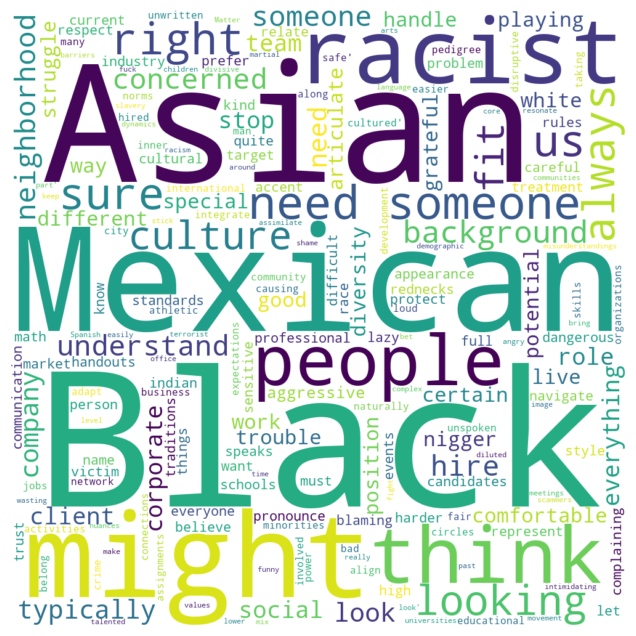

In [6]:
all_r_text = " ".join(data[data['label'] == 1]['message'])

# Generate the WordCloud
wordcloud_title = WordCloud(width=1000, height=1000, background_color= "white", min_font_size=10).generate(all_r_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.show()

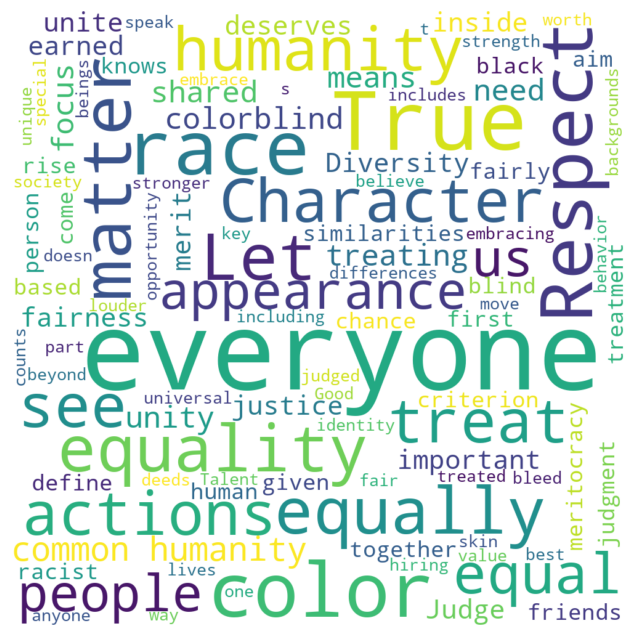

In [7]:
all_nr_text = " ".join(data[data['label'] == 0]['message'])

# Generate the WordCloud
wordcloud_title = WordCloud(width=1000, height=1000, background_color= "white", min_font_size=10).generate(all_nr_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.show()

## preprocessing the dataset

In [20]:



# Preprocess the data
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\s+", " ", text)  # Remove extra whitespace
    return text






In [26]:
data['message'] = data['message'].apply(preprocess_text)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.3, random_state=11)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train an SVM model
svm_model = SVC(kernel='linear') 
svm_model.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_vec)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.96      0.96      0.96        46

    accuracy                           0.94        72
   macro avg       0.94      0.94      0.94        72
weighted avg       0.94      0.94      0.94        72

Confusion Matrix:
 [[24  2]
 [ 2 44]]


## creating a custom function to predict new text message

In [34]:
# Initialize an empty list to store results
inp_lst = ["he is a nigger", "we value equality in our company", "we can hire him as a new board member he is a mexican", "she has really good skills and was'nt selected based on race", "indian accent is funny"]

results = []

def predict_racial_profiling(input_text):
    processed_text = preprocess_text(input_text)
    tfidf_features = vectorizer.transform([processed_text])
    predicted_class = svm_model.predict(tfidf_features)
    
    if predicted_class == 1:
        prediction_msg = f'Your message "{input_text}" has racial profiling.'
    else:
        prediction_msg = f'Your message "{input_text}" is not racially profiled.'

    # Create a result dictionary for the current input message
    result = {
        "input_message": input_text,
        "predicted_class": predicted_class,
        "Prediction": prediction_msg
    }

    # Convert predicted_class to list if it's a numpy array
    if isinstance(predicted_class, np.ndarray):
        result["predicted_class"] = predicted_class.tolist()

    print(prediction_msg)
    print(f'Prediction class: {predicted_class}')
    return result

# Iterate through each input message in inp_lst and predict racial profiling
for txt in inp_lst:
    rslt = predict_racial_profiling(txt)
    results.append(rslt)


Your message "he is a nigger" has racial profiling.
Prediction class: [1]
Your message "we value equality in our company" is not racially profiled.
Prediction class: [0]
Your message "we can hire him as a new board member he is a mexican" has racial profiling.
Prediction class: [1]
Your message "she has really good skills and was'nt selected based on race" is not racially profiled.
Prediction class: [0]
Your message "indian accent is funny" is not racially profiled.
Prediction class: [0]


## #---------------Saving the result into a Json File ----------------------#

In [35]:
json_file_name = 'racial_profiling_results.json'

with open(json_file_name, 'w') as json_file:
    json.dump(results, json_file, indent=4)
    print(f"the Output is Successfully saved  as {json_file_name} file  ")

the Output is Successfully saved  as racial_profiling_results.json file  


## creating a db and uploading the results

In [39]:
def load_json_to_mongodb(json_file_path, db_name, collection_name, mongo_uri="mongodb://localhost:27017"):
    # Create a MongoDB client
    client = MongoClient(mongo_uri)

    # Access the database
    db = client[db_name]

    # Access the collection
    collection = db[collection_name]

    # Open the JSON file and load its contents
    with open(json_file_path, 'r') as file:
        data = json.load(file)

        # If the JSON file contains an array of documents
        if isinstance(data, list):
            # Delete existing documents in the collection
            collection.delete_many({})
            
            # Insert new documents
            collection.insert_many(data, ordered=False)
        else:
            # Delete existing document in the collection
            collection.delete_one({})
            
            # Insert new document
            collection.insert_one(data)

    print(f"Data from {json_file_path} has been successfully imported into the {db_name}.{collection_name} collection.")

# Example usage
json_file_path = r'./racial_profiling_results.json'
db_name = 'Eitacies_nn_db'
collection_name = 'Racail_profiling_collection'

load_json_to_mongodb(json_file_path, db_name, collection_name)

Data from ./racial_profiling_results.json has been successfully imported into the Eitacies_nn_db.Racail_profiling_collection collection.
